## X Education Lead Scoring Logistic Regression Case Study

_By: **Shayak Majumder** | **Shreya Dutta** | **Shweta**_

**Note:** Most comments and noteworthy observations are written in markdown cells for easier referencing. 
<br>In-line comments, of course, are written with #s.

In [1]:
#First, let's import warnings and apply the 'ignore' filter

import warnings
warnings.filterwarnings('ignore')

Now, we will import the necessary libraries. <br>We will keep on adding further libraries such as sklearn or statsmodels here in the same cell as an when we need them, so that all libraries are kept in a clean format.

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## Now, Let's READ & CLEAN the data

In [3]:
pwd

'C:\\Users\\shayakm\\Downloads'

In [4]:
leads_data = pd.read_csv('C:\\Users\\shayakm\\Downloads\\Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Would be better to see all columns at once, so let's display max columns and max rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**Now, let's check the shape of the dataframe and also the info and description.**

In [7]:
leads_data.shape

(9240, 37)

In [8]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**It appears that there are several outliers, and we will also need to address the 'Select' option in some columns.**

But first, let's start with basic data cleanup.

In [10]:
#Check for duplicate entries, based on 'Lead Number' to ensure no two prospects are the same

leads_data['Lead Number'].nunique()

9240

Since the total number of rows we have is also 9240, we can rest assured that there are no duplicate entries here.

From just looking at the data, we can easily assume that 'Select' is a default option given to users in the form.
<br> Since that is of no use to us for our analysis, we will simply replace them with NaN.

In [11]:
leads_data.replace({'Select': np.nan}, inplace= True)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Now, when it comes to considering which columns need to be dropped, we can simply focus on those having no variance.
<br>Let's figure out which columns are worth dropping and club them together.

In [13]:
unique_val = leads_data.nunique()==1
cols_zero_var = unique_val[unique_val].index
cols_zero_var

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

So, as we can see, we have identified the columns that can be dropped. Let's go ahead and do that.

In [14]:
leads_data.drop(cols_zero_var, axis = 1, inplace = True)

#Let's check the shape to see if drop was successful.

leads_data.shape

(9240, 32)

Success! Those 5 columns were dropped from our df, we now have a total of 32 cols.

**Now, we should deal with the NaNs**
<br> We can check the % of null values in all columns and then choose to drop those with at least 40% missing data.

In [15]:
((leads_data.isna().sum() / 9240) * 100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [16]:
# We can drop 7 columns which have more than 40% missing values

col_drop = ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index']
leads_data.drop(col_drop, axis = 1, inplace = True)

#Let's check if drop was successful

leads_data.shape

(9240, 25)

Success! Those 7 columns were dropped.

In [17]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Ideally, we should conver Lead Number to Object dtype.

In [18]:
leads_data['Lead Number']= leads_data['Lead Number'].astype('object')
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   object 
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Now, let's look at the values of the different columns and start addressing them one by one.
<br> The idea is to **club/replace related values or marginal values** and give the columns a more concise shape, which can help us a lot in EDA.

In [19]:
#Let's start with Lead Origin

leads_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

As we can see, Lead Add Form, Lead Import and Quick Add Form are too less in number, so we can group them as Other

In [20]:
leads_data['Lead Origin']= leads_data['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form' ],'Other')

leads_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Other                       774
Name: count, dtype: int64

In [21]:
#Now, time to check out Lead Source

leads_data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Before addressing anything else, let's first quickly convert the 'google' values to 'Google'

In [22]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace({'google':'Google'})
leads_data['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

Now, to address the lesser values (less than 500), we can club them together as 'Other'
<br> We can do it easily with a quick lambda & mapping function

In [23]:
lead_source_dont_change = ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference', np.nan]
leads_data['Lead Source'] = leads_data['Lead Source'].map(lambda x : x if x in lead_source_dont_change else 'Other')

#Let's check if that worked

leads_data['Lead Source'].value_counts()

Lead Source
Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: count, dtype: int64

Success!
Let's look at Last Activity now.

In [24]:
leads_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

For easier business understanding, we can easily divvy these up into three groups of customer actions: Positive, Negative, and Neutral.

In [25]:
positive = ['SMS Sent', 'Page Visited on Website', 'Converted to Lead', 'Email Link Clicked', 'Form Submitted on Website', 
               'Approached upfront', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Modified']
negative = ['Email Bounced', 'Unreachable', 'Unsubscribed', 'Email Marked Spam']
neutral = ['Email Opened', 'Olark Chat Conversation', 'Had a Phone Conversation', 'Email Received']

leads_data['Last Activity'] = leads_data['Last Activity'].replace(positive, 'Positive')
leads_data['Last Activity'] = leads_data['Last Activity'].replace(negative, 'Negative')
leads_data['Last Activity'] = leads_data['Last Activity'].replace(neutral, 'Neutral')

In [26]:
#Let's check if that worked

leads_data['Last Activity'].value_counts()

Last Activity
Neutral     4442
Positive    4213
Negative     482
Name: count, dtype: int64

In [27]:
#Let's check the 'Last Notable Activity'

leads_data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

Using the same distinctions we made earlier, we can apply the same for Last Notable Activity column as well.

In [28]:
leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(positive, 'Positive')
leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(negative, 'Negative')
leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(neutral, 'Neutral')


# Current Groups
leads_data['Last Notable Activity'].value_counts()

Last Notable Activity
Positive    6074
Neutral     3025
Negative     141
Name: count, dtype: int64

Now, let's check out what's going on in the **'Country'** column

In [29]:
leads_data.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

Okay, understandably, India is the dominant country here.
<br> Let's take countries with less than 50 values and club them together as Other.

In [30]:
leads_data.Country = leads_data.Country.map(lambda x: x if x in ['India', 'United States', 'United Arab Emirates', np.nan] else 'Other')

leads_data.Country.value_counts()

Country
India                   6492
Other                    165
United States             69
United Arab Emirates      53
Name: count, dtype: int64

Now, let's check the situation with 'Specialization'

In [31]:
leads_data['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

From what we can see here, some users have specialization in business, some in management, and some can be considered 'Other Domain'. 
For missing values in this case, we can classify them as 'Not Shared'.

In [32]:
#Let's club related professions first

management = ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management']
business = ['Business Administration', 'International Business', 'Services Excellence']
other = ['Banking, Investment And Insurance', 'Media and Advertising', 'Travel and Tourism', 'Healthcare Management', 'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business']

leads_data['Specialization'] = leads_data['Specialization'].replace(management, 'Management')
leads_data['Specialization'] = leads_data['Specialization'].replace(business, 'Business')
leads_data['Specialization'] = leads_data['Specialization'].replace(other, 'Other Domain')

#Addressing Missing Values
leads_data['Specialization'].fillna('Not Shared', inplace = True)

#let's see if this worked
leads_data['Specialization'].value_counts(dropna = False)

Specialization
Management      3880
Not Shared      3380
Other Domain    1359
Business         621
Name: count, dtype: int64

Now, let's look at 'What is your current occupation'

In [33]:
leads_data['What is your current occupation'].value_counts(dropna = False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

Here, we can see that null values, or people who chose not to share their occupation are pretty high. 
<br> This can have a serious implication on the lead scoring model, as people who are not sharing profession/occupation might not be potential leads, which we can figure out later.
<br>We can replace NaN values with 'Not Shared'.
<br>Also, we can club Housewide and Businessman into Other as well.

In [34]:
#First, let's address the NaN values
leads_data['What is your current occupation'].fillna('Not Shared', inplace= True)

#Now, let's club Housewife and Businessman into Other
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(['Housewife','Businessman'], 'Other')

#Now, let's see if the above worked
leads_data['What is your current occupation'].value_counts(dropna= False)

What is your current occupation
Unemployed              5600
Not Shared              2690
Working Professional     706
Student                  210
Other                     34
Name: count, dtype: int64

## DATA Visualization
Now that we have cleaned up the data, we can start **visualizing** it.

### Let's start with Numerical data first

<Figure size 2000x1800 with 0 Axes>

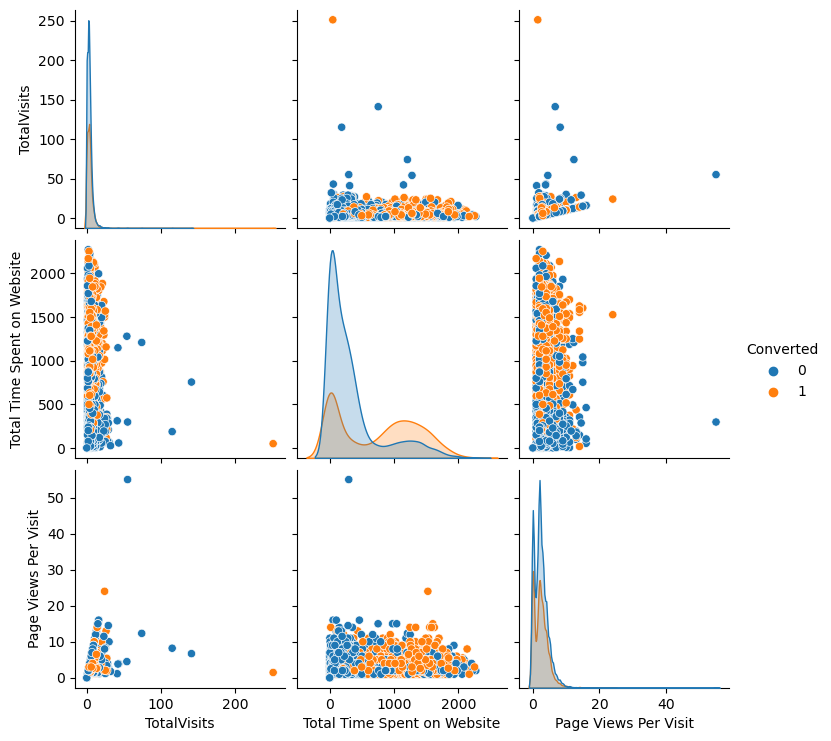

In [35]:
#pairplots first

plt.figure(figsize=[20,18])
sns.pairplot(leads_data.select_dtypes(include= ['int64','float64']), hue = 'Converted')
plt.show()

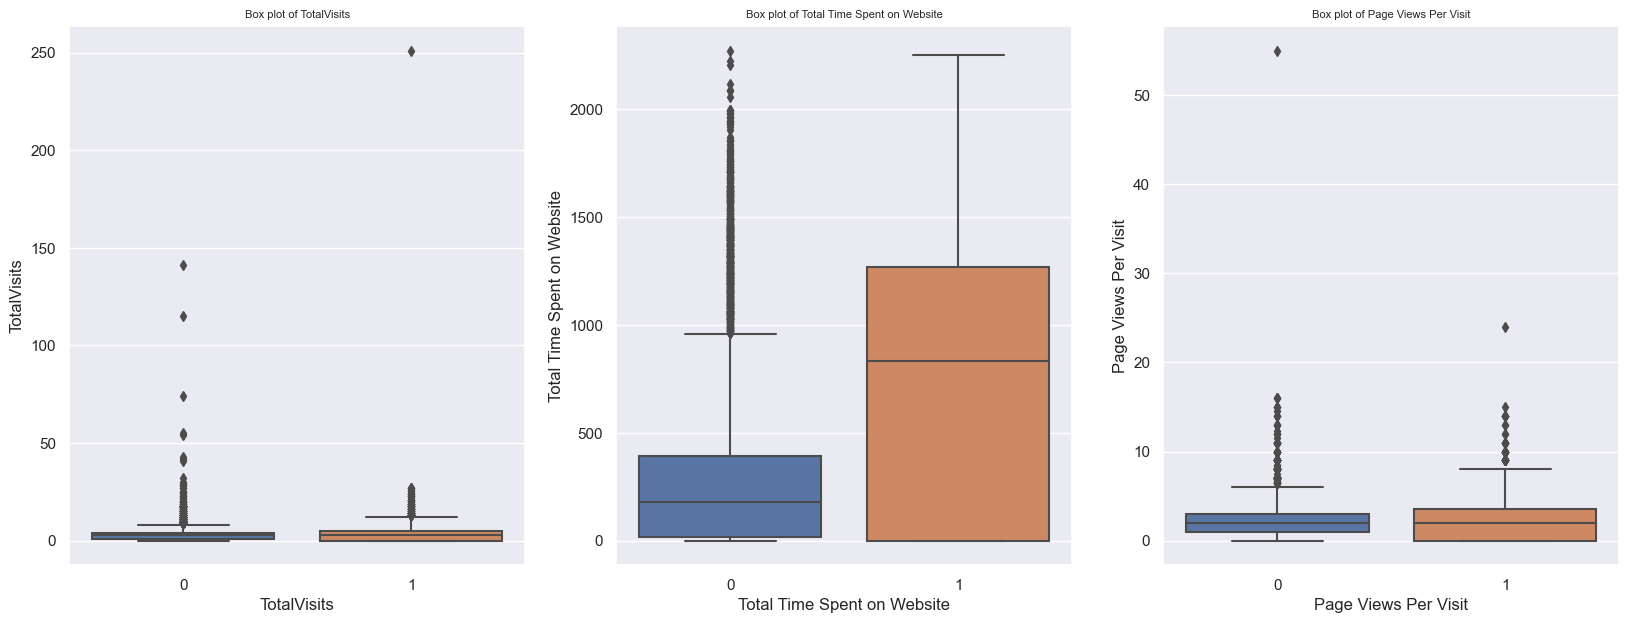

In [36]:
#Let's check out the box plots of the three columns from above

cols= ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

sns.set()
plt.figure(figsize = [20,7])

for i, col in enumerate(cols, 1):
    plt.subplot(1,3,i)
    title_text = f'Box plot of {col}'
    x_label = f'{col}'
    fig = sns.boxplot(data = leads_data, y = col, x = 'Converted')
    fig.set_title(title_text, fontdict = { 'fontsize': 8})
    fig.set_xlabel(x_label, fontdict = {'fontsize': 12})

## What We Can See:

For ***TotalVisits***, the number of outliers for Converted 0 is higher. This means that visitors are not being converted into customers, perhaps due to better options elsewhere.
<br>For ***Total Time Spent On Website***, the median is notably higher for people spending more time on the website. These are the team's primary target visitors - the ones who spend more time stand more chances to get converted. 
<br>For ***Page Views Per Visit***, the median is very low for both categories, which means PVs have got nothing to do with conversions. 

Let's **remove the outliers** now.
<br> We can do that by divvying them up into quantiles and then removing based on cutoff points.

In [37]:
#First, let's deal with TotalVisits

leads_data.TotalVisits.quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([  0.,   0.,   3.,   5.,   7.,  10.,  17., 251.])

In [38]:
leads_data = leads_data[~(leads_data['TotalVisits'] > 17)]

In [39]:
#Now, let's look at Total Time Spent on Website

leads_data['Total Time Spent on Website'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([   0.  ,    0.  ,  247.  ,  933.  , 1379.  , 1559.4 , 1839.44,
       2272.  ])

In [40]:
leads_data = leads_data[~(leads_data['Total Time Spent on Website'] > 1839.44)]

In [41]:
#Lastly, time for Page Views Per Visit

leads_data['Page Views Per Visit'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([ 0.,  0.,  2.,  3.,  5.,  6.,  9., 16.])

In [42]:
leads_data= leads_data[~(leads_data['Page Views Per Visit'] > 9)]

In [43]:
#Let's quick check if the above worked
leads_data.shape

(8998, 25)

### Let's deal with Cateogrical data now

To visualize in a countplot, we can club all the necessary columns in a single list first.

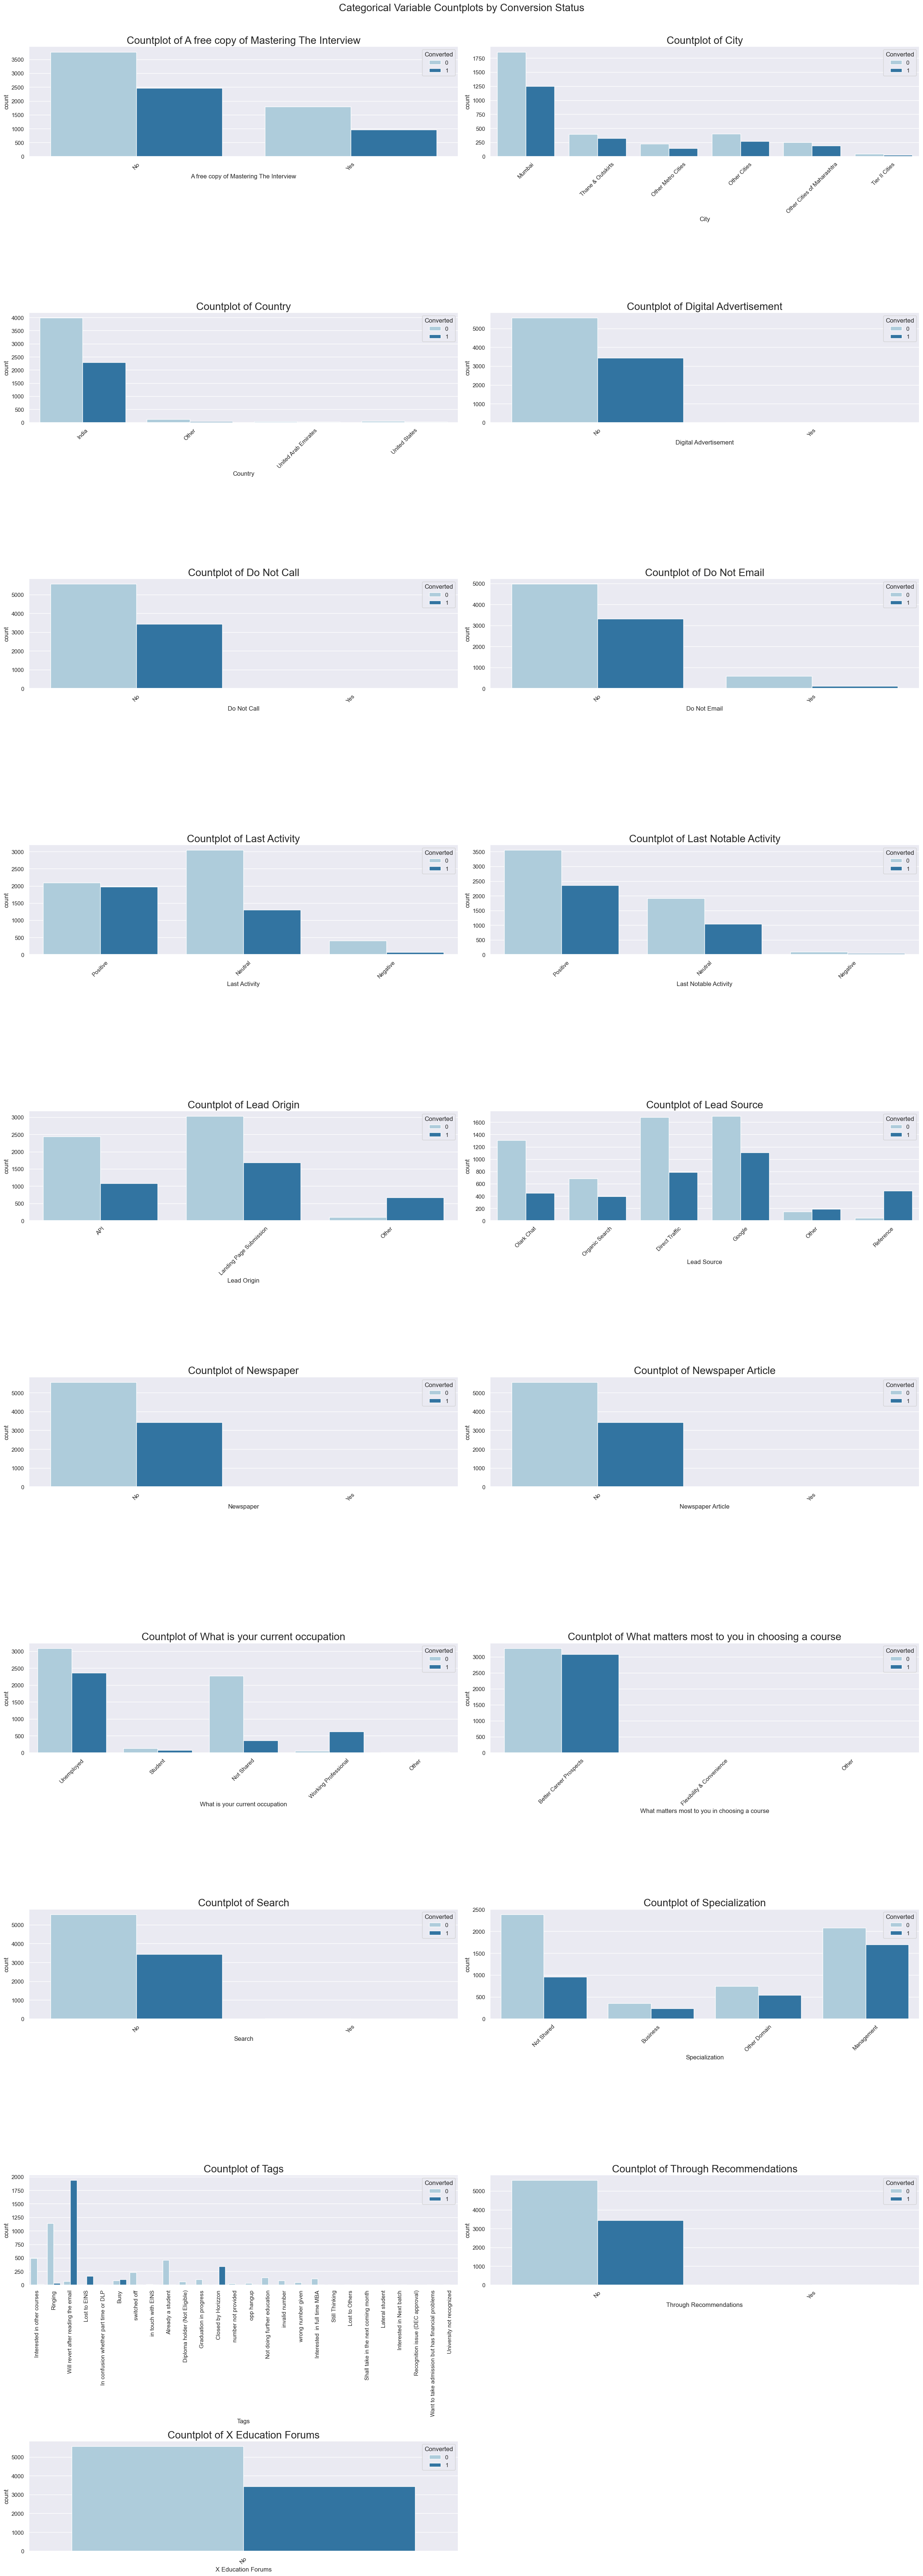

In [44]:
leads_data['Converted'] = leads_data['Converted'].astype(str)

col_cat = ['A free copy of Mastering The Interview', 'City', 'Country', 'Digital Advertisement', 
    'Do Not Call', 'Do Not Email', 'Last Activity', 'Last Notable Activity', 
    'Lead Origin', 'Lead Source', 'Newspaper', 'Newspaper Article', 
    'What is your current occupation', 'What matters most to you in choosing a course', 
    'Search', 'Specialization', 'Tags', 'Through Recommendations', 'X Education Forums']

#Now, let's create the plot

sns.set_style("darkgrid")
sns.color_palette("coolwarm", 8)
plt.figure(figsize=(25, 70))

for i, col in enumerate(col_cat, 1):
    ax = plt.subplot(10, 2, i)
    sns.countplot(data=leads_data, x=col, hue='Converted', palette='Paired', ax=ax)

    if col == 'Tags':
        ax.tick_params(axis='x', rotation=90)
    else:
        ax.tick_params(axis='x', rotation=45)

    ax.set_title(f'Countplot of {col}', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.suptitle('Categorical Variable Countplots by Conversion Status', fontsize=20, y=0.99)
plt.show()

## Top Inferences:

1. Most of the customers are from ***India*** and from ***Management*** specializations. Within India itself, the conversion rate of ***Other Cities*** and ***Other Cities of Maharashtra*** are comparatively high. The company should target outreach accordingly.
2. Users with ***Positive*** attributes in both ***Last Activity*** and ***Last Notable Activity*** have notably more conversions.
3. The ***Free Copy of Mastering The Interview*** has yielded more conversions for those who have availed of the book. So, X Education should go heavily after users who have said ***Yes*** to the free book.
4. Users coming in through ***Landing Page Submision*** are showing more conversion success rates than others. So, definitely target these potential customers.
5. ***Google*** and ***Direct Traffic*** are the biggest soruce of conversion traffic, with more impact on the former.
6. While odds of ***Working Professional*** users to convert are supremely high, those who are ***Unemployed*** also showcase a high conversion scope.

## **Model Building**
Now, time to prepare the data for our ML steps. 
<br> We'll copy the data into a **fresh dataframe** first, then **drop some unnecessary columns** that are not needed for lead-scoring, and then finally go ahead with train-test split.

In [45]:
leads_data_copy = leads_data.copy()
leads_data_copy.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Positive,NaN,Not Shared,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Positive
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Neutral,India,Not Shared,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Neutral
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Neutral,India,Business,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Neutral
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Negative,India,Other Domain,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Positive
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Positive,India,Not Shared,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Positive


In [46]:
#Dropping columns that are not needed for our lead scoring model

cols_drop = ['Last Activity','Last Notable Activity','Tags', 'Prospect ID', 'Lead Number']
leads_data_copy.drop(cols_drop, axis = 1, inplace = True)

leads_data_copy.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Not Shared,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Not Shared,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Other Domain,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Not Shared,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No


Now, time to **split data** into train and test.
<br> Of course, the *Converted* column will be our y-axis, so we will pop that out.

In [47]:
y = leads_data_copy.pop('Converted')
X = leads_data_copy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 100)

In [48]:
#Let's see if that worked

X_train.shape

(6298, 19)

In [49]:
y_train.shape

(6298,)

Success! 
<br> Now, we can move on to **dealing with missing values in X_train and X_test data** by imputing with mode (for categorical data) and median (for continuous data) 

In [50]:
#Checking number of null values in all columns

leads_data_copy.isna().sum()

Lead Origin                                         0
Lead Source                                        35
Do Not Email                                        0
Do Not Call                                         0
TotalVisits                                       133
Total Time Spent on Website                         0
Page Views Per Visit                              133
Country                                          2455
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course    2652
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
City                                             3626
A free copy of Mastering The

Alright, so we have to deal with only 6 columns of null values, namely, 'Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Country', 'What matters most to you in choosing a course', and 'City'

In [51]:
#Let's impute the values one by one, using mode for categorical and median for numerical, on train data

X_train['Lead Source'].fillna((X_train['Lead Source'].mode()[0]), inplace= True)
X_test['Lead Source'].fillna((X_train['Lead Source'].mode()[0]), inplace= True)

X_train.isna().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
TotalVisits                                        98
Total Time Spent on Website                         0
Page Views Per Visit                               98
Country                                          1688
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course    1871
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
City                                             2515
A free copy of Mastering The

In [52]:
X_train['TotalVisits'].fillna((X_train['TotalVisits'].mode()[0]), inplace= True)
X_test['TotalVisits'].fillna((X_train['TotalVisits'].mode()[0]), inplace= True)

X_train['Page Views Per Visit'].fillna((X_train['Page Views Per Visit'].mode()[0]), inplace= True)
X_test['Page Views Per Visit'].fillna((X_train['Page Views Per Visit'].mode()[0]), inplace= True)

X_train['Country'].fillna((X_train['Country'].mode()[0]), inplace= True)
X_test['Country'].fillna((X_train['Country'].mode()[0]), inplace= True)

X_train['What matters most to you in choosing a course'].fillna((X_train['What matters most to you in choosing a course'].mode()[0]), inplace= True)
X_test['What matters most to you in choosing a course'].fillna((X_train['What matters most to you in choosing a course'].mode()[0]), inplace= True)

X_train['City'].fillna((X_train['City'].mode()[0]), inplace= True)
X_test['City'].fillna((X_train['City'].mode()[0]), inplace= True)

X_train.isna().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
City                                             0
A free copy of Mastering The Interview           0
dtype: int64

In [53]:
X_test.isna().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
City                                             0
A free copy of Mastering The Interview           0
dtype: int64

#Looks like this worked fine.
<br> Now,  let's **encode categorical data**.
<br> Let's start with the **yes/no (binary) encoding** first.



In [54]:
cols_binary = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

X_train[cols_binary] = X_train[cols_binary].replace({'No': 0, 'Yes': 1})
X_test[cols_binary] = X_test[cols_binary].replace({'No': 0, 'Yes': 1})

Now, we can **create dummies** for other categorical columns.

In [55]:
cols_multi = ['Lead Origin','Lead Source','Country', 'Specialization', 'What matters most to you in choosing a course', 'What is your current occupation', 'City']

train_dum = pd.get_dummies(X_train[cols_multi], drop_first= True)
test_dum = pd.get_dummies(X_test[cols_multi], drop_first= True)

Finally, let's **join** train_dum and test_dum into X_train and X_test.
<br>We should also **drop** original columns at the same time.

In [56]:
#Joining sets

X_train = X_train.merge(train_dum, how = 'inner', left_index = True, right_index = True)
X_train.drop(cols_multi, axis = 1, inplace = True)

X_test = X_test.merge(test_dum, how = 'inner', left_index = True, right_index = True)
X_test.drop(cols_multi, axis = 1, inplace = True)

In [57]:
# Let's see if that worked

print(X_train.shape)
print(X_test.shape)

(6298, 36)
(2700, 34)


## Time for MinMax Scaling!
Let's treat numeric predictor variables to bring them under a scale.

In [58]:
col_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = MinMaxScaler()
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

#Let's check if that worked:
X_train[col_scale].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4714,0.000000,0.000000,0.000000
5794,0.000000,0.000000,0.000000
876,0.000000,0.000000,0.000000
7767,0.764706,0.460033,0.181111
7895,0.117647,0.603589,0.222222


In [59]:
print(X_train.shape)
print(X_test.shape)

(6298, 36)
(2700, 34)


In [60]:
#Let's remove the extra two columns from the train set

columns_to_remove = ['What matters most to you in choosing a course_Flexibility & Convenience', 'What matters most to you in choosing a course_Other']

X_train = X_train.drop(columns=columns_to_remove)

print(X_train.shape)
print(X_test.shape)

(6298, 34)
(2700, 34)


### Let's check correlation of all features now

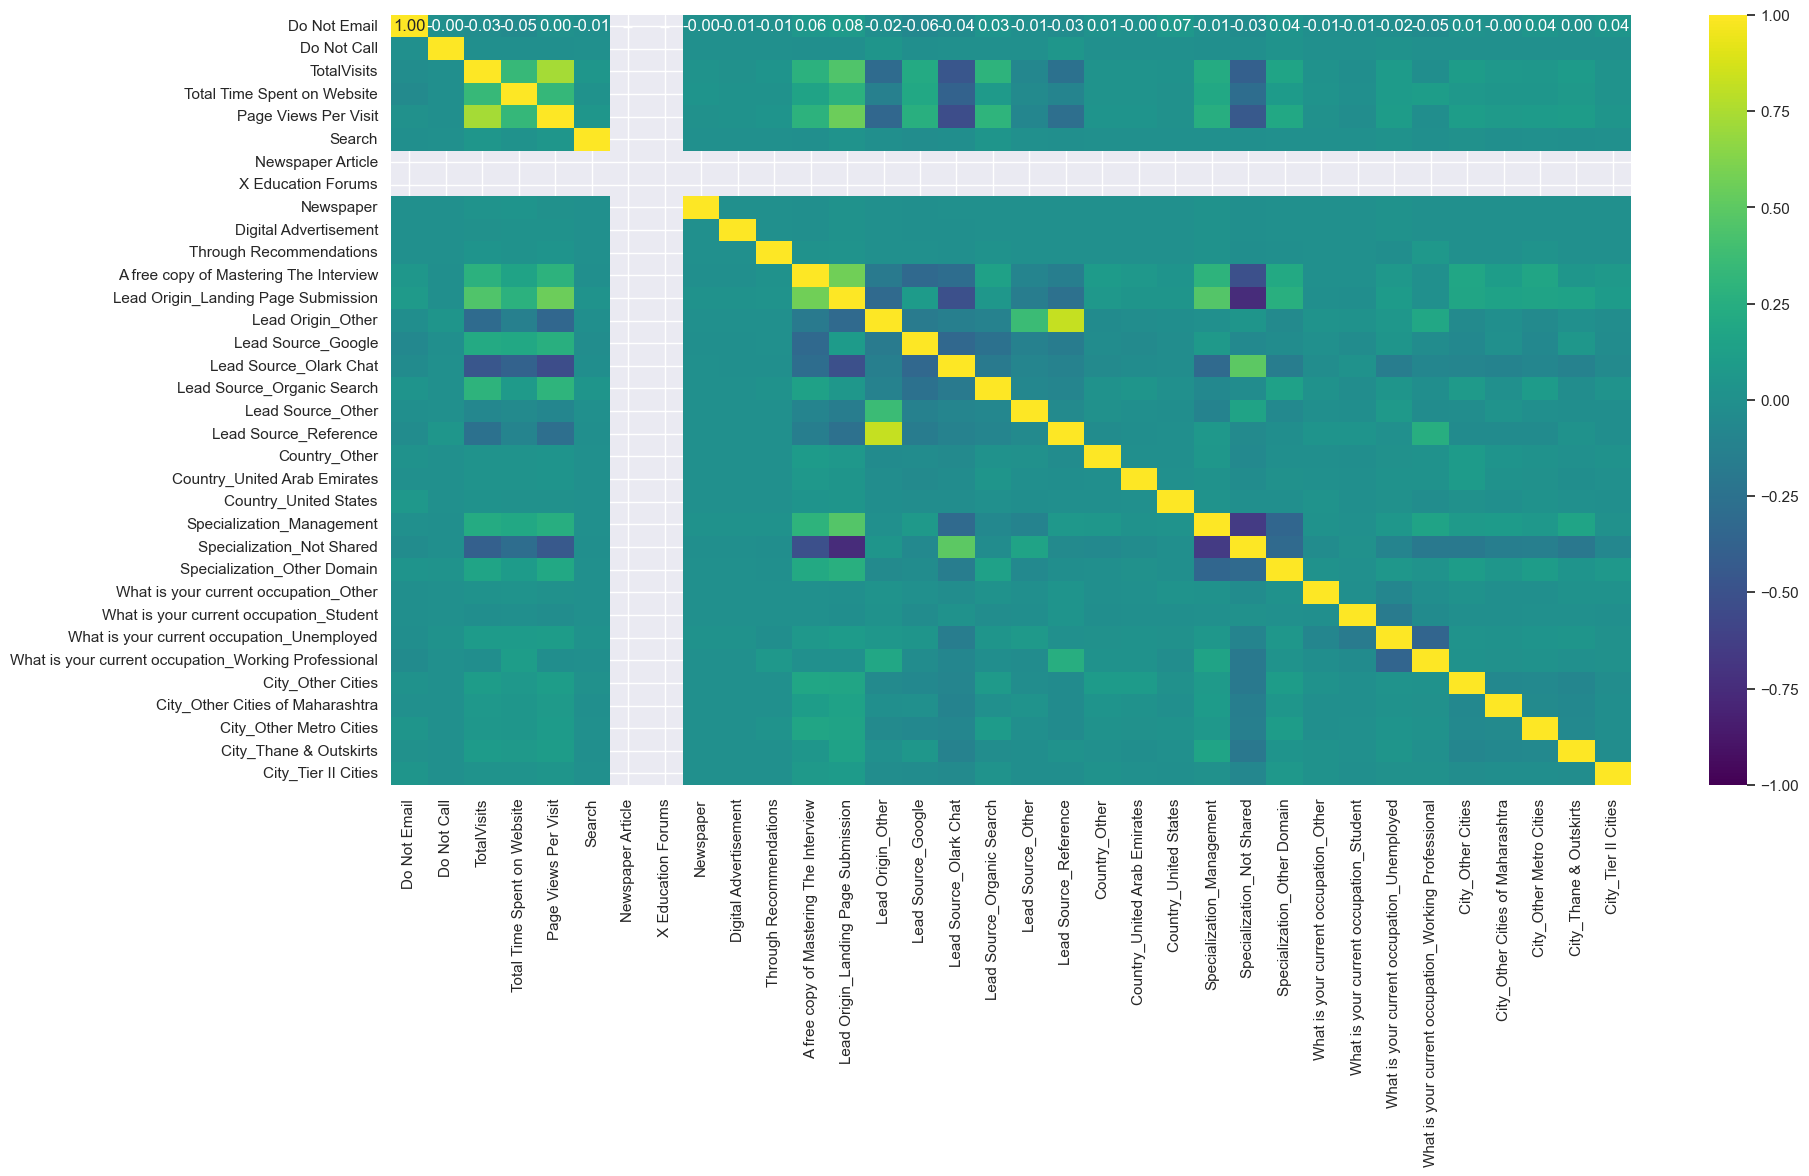

In [61]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True, cmap = 'viridis', fmt = '.2f', vmin = -1, vmax = 1)
plt.show()

Let's go ahead and **drop Newspaper Article and X Education Forums form both X_train and X_test** as they are not of much use (as we saw in EDA)

In [62]:
X_train = X_train.drop(columns = ['Newspaper Article', 'X Education Forums'])
X_test = X_test.drop(columns = ['Newspaper Article', 'X Education Forums'])

Now, let's check the correlation again, this time using a different color map.

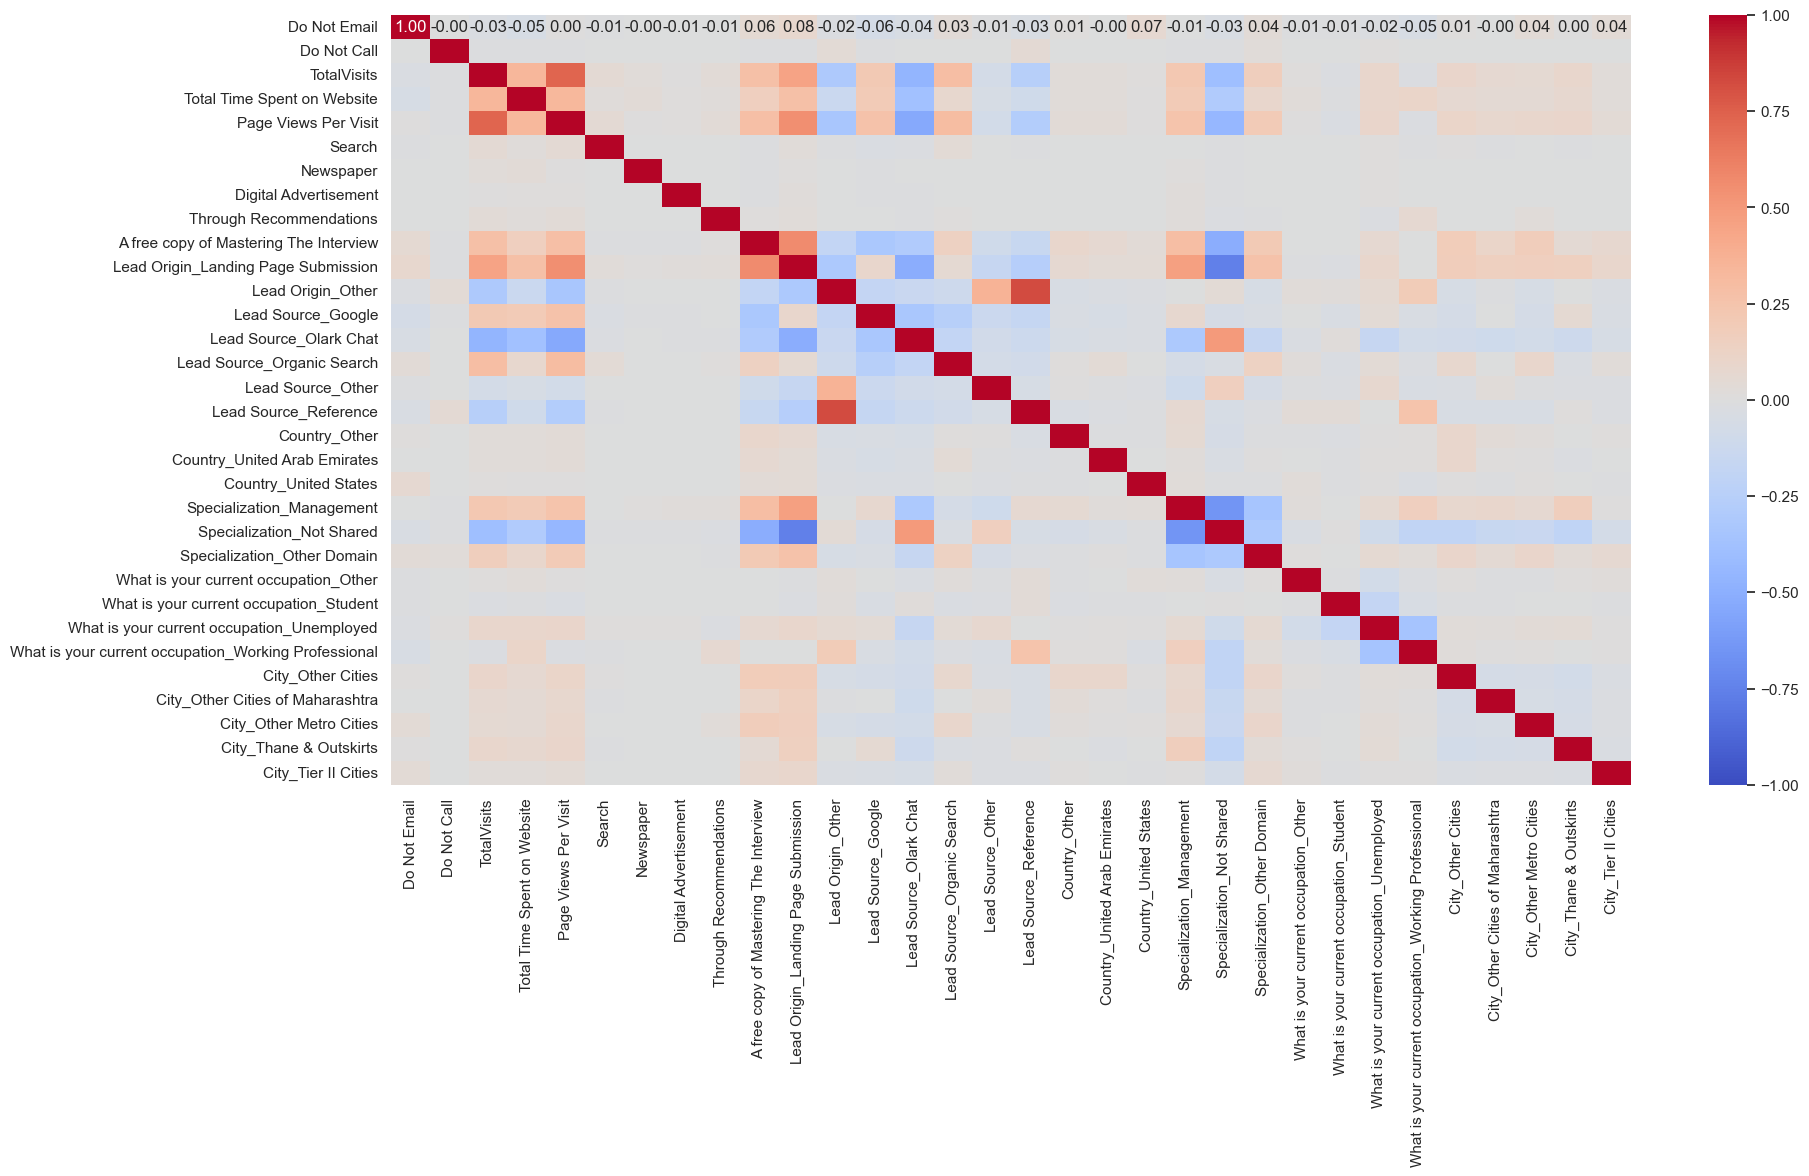

In [63]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True, cmap = 'coolwarm', fmt = '.2f', vmin = -1, vmax = 1)
plt.show()

As we can see, the columns **Lead Origin_Other** and **Lead Source_Olark Chat** have high correlation with **Lead Source_Reference** and **Specialization_Not Shared**, respectively. So, we will go ahead and drop these two columns.

In [64]:
X_train.drop(['Lead Source_Reference','Specialization_Not Shared'], axis = 1, inplace = True)
X_test.drop(['Lead Source_Reference','Specialization_Not Shared'], axis = 1, inplace = True)

In [65]:
#Let's see if this worked

print(X_train.shape)
print(X_test.shape)

(6298, 30)
(2700, 30)


Success! Now, our data is prepped and ready for **Model Building**

## Model Building

In [66]:
#Let's fit a logisitic regression model

lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

Let's use **Recursive Feature Elimination** to find the top 20 features

In [67]:
#Running RFE

rfe = RFE(estimator = lreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [68]:
#Let's check which columns were selected

top_20 = X_train.columns[rfe.support_]
top_20

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Newspaper',
       'Through Recommendations', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Other', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other', 'Country_Other',
       'Specialization_Management', 'Specialization_Other Domain',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [69]:
#Let's go ahead the features selected by RFE

X_train = X_train[top_20]
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Newspaper',
       'Through Recommendations', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Other', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other', 'Country_Other',
       'Specialization_Management', 'Specialization_Other Domain',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 1 

Time to build our first model.
<br> But first, we need to *troubleshoot* a bit, as X_train and y_train have been *cast as numpy array with object type*.
<br> So, we need to *convert all columns to numeric* first.
<br> Then, we need to *explicitly convert X_train and y_train to numpy arrays*.
<br> However, to retain column names, we need to *reassign them afterwards* before we create the model.

In [70]:
#Converting columns to numeric

X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [71]:
#Re-checking column names

X_train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Newspaper',
       'Through Recommendations', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Other', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other', 'Country_Other',
       'Specialization_Management', 'Specialization_Other Domain',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [72]:
#Saving column names to reassign later

column_names = X_train.columns

In [73]:
#Converting X-train and y_train to numpy arrays

X_train = np.asarray(X_train, dtype=float)
y_train = np.asarray(y_train, dtype=float)

In [74]:
#Converting X_Train back to numpy arrays since we need the column names

X_train = pd.DataFrame(X_train, columns = column_names)

In [75]:
#Now building the first model

X_train_sm = sm.add_constant(X_train)

logmod1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2808.1
Date:                Sat, 18 Jan 2025   Deviance:                       5616.2
Time:                        09:34:36   Pearson chi2:                 6.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3551
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4171      0.148    -23.033      0.000      -3.708      -3.126
Do Not Email                                            -1.1828      0.155     -7.631      0.000      -1.487      -0.879
Do Not Call                                             20.5598   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                              0.9529      0.286      3.332      0.001       0.392       1.514
Total Time Spent on Website                              3.8222      0.137     27.920      0.000       3.554       4.091
Page Views Per Visit                                    -0.2893      0.262     -1.103      0.270      -0.803       0.225
Newspaper                                              -24.8110   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Through Recommendations                                 20.7772   2.16e+04      0.001      0.999   -4.23e+04    4.24e+04
Lead Origin_Landing Page Submission                     -0.2906      0.114     -2.543      0.011      -0.515      -0.067
Lead Origin_Other                                        3.6254      0.203     17.847      0.000       3.227       4.023
Lead Source_Google                                       0.2902      0.091      3.174      0.002       0.111       0.469
Lead Source_Olark Chat                                   1.2130      0.148      8.202      0.000       0.923       1.503
Lead Source_Organic Search                               0.1988      0.123      1.619      0.106      -0.042       0.440
Lead Source_Other                                       -0.3092      0.219     -1.411      0.158      -0.739       0.120
Country_Other                                           -0.3403      0.271     -1.258      0.209      -0.871       0.190
Specialization_Management                                0.3825      0.100      3.837      0.000       0.187       0.578
Specialization_Other Domain                              0.4474      0.122      3.672      0.000       0.209       0.686
What is your current occupation_Other                    1.6994      0.483      3.520      0.000       0.753       2.646
What is your current occupation_Student                  1.0654      0.232      4.597      0.000       0.611       1.520
What is your current occupation_Unemployed               1.3506      0.086     15.725      0.000       1.182       1.519
What is your current occupation_Working Professional     3.6461      0.188     19.405      0.000       3.278       4.014
========================================================================================================================
"""

As we can see, there are several columns with **very high p-values**.
<br>These are **'Do Not Call', 'Page Views Per Visit', 'Newspaper', 'Through Recommendations', 'Lead Source_Organic Search', 'Lead Source_Other', 'Country_Other'**
<br>We'll start dropping one by one, starting with highest value and then build model again to see what changes.

But before that, let's quicly calculate the VIF values and see where we stand.

In [76]:
#Creating VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Page Views Per Visit,6.60
7,Lead Origin_Landing Page Submission,5.16
2,TotalVisits,4.99
14,Specialization_Management,3.71
18,What is your current occupation_Unemployed,2.95
3,Total Time Spent on Website,2.20
15,Specialization_Other Domain,1.99
9,Lead Source_Google,1.88
8,Lead Origin_Other,1.70
11,Lead Source_Organic Search,1.56


From what we can see, **'Page Views Per Visit', 'Lead Origin_Landing Page Submission' have high VIF values**. 
<br> Ideally, they should be removed as well. But we will come back to it later, after we deal with p-values.

### Dropping Features One By One



In [77]:
#First, let's drop 'Do Not Call'

X_train.drop(['Do Not Call'], axis = 1, inplace = True)
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Newspaper', 'Through Recommendations',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other', 'Country_Other',
       'Specialization_Management', 'Specialization_Other Domain',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

## Model 2

Let's refit the model again and see what happens

In [78]:
X_train_sm = sm.add_constant(X_train)

logmod2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2808.2
Date:                Sat, 18 Jan 2025   Deviance:                       5616.5
Time:                        09:34:37   Pearson chi2:                 6.77e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3551
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4168      0.148    -23.032      0.000      -3.708      -3.126
Do Not Email                                            -1.1832      0.155     -7.632      0.000      -1.487      -0.879
TotalVisits                                              0.9529      0.286      3.331      0.001       0.392       1.513
Total Time Spent on Website                              3.8222      0.137     27.919      0.000       3.554       4.090
Page Views Per Visit                                    -0.2893      0.262     -1.103      0.270      -0.803       0.225
Newspaper                                              -23.8110   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations                                 19.7777   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
Lead Origin_Landing Page Submission                     -0.2912      0.114     -2.549      0.011      -0.515      -0.067
Lead Origin_Other                                        3.6283      0.203     17.864      0.000       3.230       4.026
Lead Source_Google                                       0.2899      0.091      3.172      0.002       0.111       0.469
Lead Source_Olark Chat                                   1.2127      0.148      8.200      0.000       0.923       1.503
Lead Source_Organic Search                               0.1985      0.123      1.616      0.106      -0.042       0.439
Lead Source_Other                                       -0.3114      0.219     -1.421      0.155      -0.741       0.118
Country_Other                                           -0.3403      0.271     -1.258      0.209      -0.871       0.190
Specialization_Management                                0.3829      0.100      3.841      0.000       0.188       0.578
Specialization_Other Domain                              0.4488      0.122      3.684      0.000       0.210       0.688
What is your current occupation_Other                    1.6990      0.483      3.519      0.000       0.753       2.645
What is your current occupation_Student                  1.0650      0.232      4.595      0.000       0.611       1.519
What is your current occupation_Unemployed               1.3506      0.086     15.724      0.000       1.182       1.519
What is your current occupation_Working Professional     3.6458      0.188     19.403      0.000       3.278       4.014
========================================================================================================================
"""

In [79]:
#Now, let's drop 'Newspaper'

X_train.drop(['Newspaper'], axis = 1, inplace = True)
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Through Recommendations',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other', 'Country_Other',
       'Specialization_Management', 'Specialization_Other Domain',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

## Model 3

Let's refit again

In [80]:
X_train_sm = sm.add_constant(X_train)

logmod3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.6
Date:                Sat, 18 Jan 2025   Deviance:                       5621.2
Time:                        09:34:37   Pearson chi2:                 6.77e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3546
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4130      0.148    -23.021      0.000      -3.704      -3.122
Do Not Email                                            -1.1820      0.155     -7.627      0.000      -1.486      -0.878
TotalVisits                                              0.9295      0.286      3.253      0.001       0.369       1.490
Total Time Spent on Website                              3.8124      0.137     27.883      0.000       3.544       4.080
Page Views Per Visit                                    -0.2806      0.262     -1.071      0.284      -0.794       0.233
Through Recommendations                                 19.7826   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
Lead Origin_Landing Page Submission                     -0.2914      0.114     -2.551      0.011      -0.515      -0.068
Lead Origin_Other                                        3.6248      0.203     17.855      0.000       3.227       4.023
Lead Source_Google                                       0.2937      0.091      3.215      0.001       0.115       0.473
Lead Source_Olark Chat                                   1.2105      0.148      8.190      0.000       0.921       1.500
Lead Source_Organic Search                               0.2029      0.123      1.653      0.098      -0.038       0.443
Lead Source_Other                                       -0.3089      0.219     -1.410      0.159      -0.738       0.120
Country_Other                                           -0.3378      0.270     -1.249      0.212      -0.868       0.192
Specialization_Management                                0.3826      0.100      3.839      0.000       0.187       0.578
Specialization_Other Domain                              0.4506      0.122      3.700      0.000       0.212       0.689
What is your current occupation_Other                    1.7003      0.483      3.522      0.000       0.754       2.646
What is your current occupation_Student                  1.0653      0.232      4.598      0.000       0.611       1.519
What is your current occupation_Unemployed               1.3487      0.086     15.711      0.000       1.180       1.517
What is your current occupation_Working Professional     3.6449      0.188     19.405      0.000       3.277       4.013
========================================================================================================================
"""

In [81]:
#Time to drop 'Through Recommendations'

X_train.drop(['Through Recommendations'], axis = 1, inplace = True)
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Other', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other', 'Country_Other',
       'Specialization_Management', 'Specialization_Other Domain',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

## Model 4

In [82]:
X_train_sm = sm.add_constant(X_train)

logmod4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod4.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2811.3
Date:                Sat, 18 Jan 2025   Deviance:                       5622.6
Time:                        09:34:37   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3544
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4144      0.148    -23.042      0.000      -3.705      -3.124
Do Not Email                                            -1.1829      0.155     -7.631      0.000      -1.487      -0.879
TotalVisits                                              0.9341      0.286      3.270      0.001       0.374       1.494
Total Time Spent on Website                              3.8131      0.137     27.892      0.000       3.545       4.081
Page Views Per Visit                                    -0.2776      0.262     -1.060      0.289      -0.791       0.235
Lead Origin_Landing Page Submission                     -0.2903      0.114     -2.542      0.011      -0.514      -0.066
Lead Origin_Other                                        3.6263      0.203     17.864      0.000       3.228       4.024
Lead Source_Google                                       0.2930      0.091      3.207      0.001       0.114       0.472
Lead Source_Olark Chat                                   1.2115      0.148      8.199      0.000       0.922       1.501
Lead Source_Organic Search                               0.2012      0.123      1.639      0.101      -0.039       0.442
Lead Source_Other                                       -0.3097      0.219     -1.413      0.158      -0.739       0.120
Country_Other                                           -0.3395      0.271     -1.255      0.210      -0.870       0.191
Specialization_Management                                0.3817      0.100      3.831      0.000       0.186       0.577
Specialization_Other Domain                              0.4484      0.122      3.683      0.000       0.210       0.687
What is your current occupation_Other                    1.7002      0.483      3.522      0.000       0.754       2.646
What is your current occupation_Student                  1.0653      0.232      4.598      0.000       0.611       1.519
What is your current occupation_Unemployed               1.3491      0.086     15.715      0.000       1.181       1.517
What is your current occupation_Working Professional     3.6572      0.188     19.486      0.000       3.289       4.025
========================================================================================================================
"""

In [83]:
#Now, let's drop 'Page Views Per Visit'

X_train.drop(['Page Views Per Visit'], axis = 1, inplace = True)
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other', 'Country_Other',
       'Specialization_Management', 'Specialization_Other Domain',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

## Model 5

In [84]:
X_train_sm = sm.add_constant(X_train)

logmod5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod5.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2811.9
Date:                Sat, 18 Jan 2025   Deviance:                       5623.7
Time:                        09:34:37   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3543
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4442      0.146    -23.649      0.000      -3.730      -3.159
Do Not Email                                            -1.1810      0.155     -7.619      0.000      -1.485      -0.877
TotalVisits                                              0.7857      0.249      3.154      0.002       0.297       1.274
Total Time Spent on Website                              3.8134      0.137     27.893      0.000       3.545       4.081
Lead Origin_Landing Page Submission                     -0.3080      0.113     -2.726      0.006      -0.529      -0.087
Lead Origin_Other                                        3.6652      0.200     18.340      0.000       3.274       4.057
Lead Source_Google                                       0.2813      0.091      3.103      0.002       0.104       0.459
Lead Source_Olark Chat                                   1.2414      0.145      8.553      0.000       0.957       1.526
Lead Source_Organic Search                               0.1778      0.121      1.474      0.141      -0.059       0.414
Lead Source_Other                                       -0.3245      0.219     -1.484      0.138      -0.753       0.104
Country_Other                                           -0.3372      0.271     -1.246      0.213      -0.868       0.193
Specialization_Management                                0.3763      0.099      3.782      0.000       0.181       0.571
Specialization_Other Domain                              0.4387      0.121      3.615      0.000       0.201       0.677
What is your current occupation_Other                    1.7014      0.482      3.526      0.000       0.756       2.647
What is your current occupation_Student                  1.0637      0.232      4.590      0.000       0.609       1.518
What is your current occupation_Unemployed               1.3477      0.086     15.704      0.000       1.179       1.516
What is your current occupation_Working Professional     3.6557      0.188     19.474      0.000       3.288       4.024
========================================================================================================================
"""

In [85]:
#Now, let's drop 'Country_Other'

X_train.drop(['Country_Other'], axis = 1, inplace = True)
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Specialization_Management', 'Specialization_Other Domain',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

## Model 6

In [86]:
X_train_sm = sm.add_constant(X_train)

logmod6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod6.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2812.7
Date:                Sat, 18 Jan 2025   Deviance:                       5625.3
Time:                        09:34:37   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3542
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4544      0.145    -23.752      0.000      -3.739      -3.169
Do Not Email                                            -1.1793      0.155     -7.609      0.000      -1.483      -0.876
TotalVisits                                              0.7920      0.249      3.181      0.001       0.304       1.280
Total Time Spent on Website                              3.8105      0.137     27.883      0.000       3.543       4.078
Lead Origin_Landing Page Submission                     -0.3069      0.113     -2.717      0.007      -0.528      -0.086
Lead Origin_Other                                        3.6751      0.200     18.404      0.000       3.284       4.066
Lead Source_Google                                       0.2878      0.090      3.181      0.001       0.110       0.465
Lead Source_Olark Chat                                   1.2505      0.145      8.625      0.000       0.966       1.535
Lead Source_Organic Search                               0.1807      0.121      1.498      0.134      -0.056       0.417
Lead Source_Other                                       -0.3236      0.219     -1.480      0.139      -0.752       0.105
Specialization_Management                                0.3733      0.099      3.753      0.000       0.178       0.568
Specialization_Other Domain                              0.4391      0.121      3.617      0.000       0.201       0.677
What is your current occupation_Other                    1.7080      0.482      3.540      0.000       0.762       2.654
What is your current occupation_Student                  1.0691      0.232      4.614      0.000       0.615       1.523
What is your current occupation_Unemployed               1.3477      0.086     15.703      0.000       1.180       1.516
What is your current occupation_Working Professional     3.6508      0.188     19.451      0.000       3.283       4.019
========================================================================================================================
"""

In [87]:
# Now, time to drop 'Lead Source_Other'

X_train.drop(['Lead Source_Other'], axis = 1, inplace = True)
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Specialization_Management',
       'Specialization_Other Domain', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

## Model 7

In [88]:
X_train_sm = sm.add_constant(X_train)

logmod7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod7.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.8
Date:                Sat, 18 Jan 2025   Deviance:                       5627.5
Time:                        09:34:37   Pearson chi2:                 6.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3539
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4889      0.144    -24.305      0.000      -3.770      -3.208
Do Not Email                                            -1.1731      0.155     -7.590      0.000      -1.476      -0.870
TotalVisits                                              0.7661      0.248      3.085      0.002       0.279       1.253
Total Time Spent on Website                              3.8114      0.137     27.887      0.000       3.544       4.079
Lead Origin_Landing Page Submission                     -0.2938      0.112     -2.613      0.009      -0.514      -0.073
Lead Origin_Other                                        3.5765      0.186     19.275      0.000       3.213       3.940
Lead Source_Google                                       0.3121      0.089      3.510      0.000       0.138       0.486
Lead Source_Olark Chat                                   1.2827      0.143      8.951      0.000       1.002       1.564
Lead Source_Organic Search                               0.2064      0.119      1.730      0.084      -0.027       0.440
Specialization_Management                                0.3877      0.099      3.922      0.000       0.194       0.581
Specialization_Other Domain                              0.4525      0.121      3.742      0.000       0.216       0.690
What is your current occupation_Other                    1.7262      0.481      3.591      0.000       0.784       2.668
What is your current occupation_Student                  1.0827      0.231      4.689      0.000       0.630       1.535
What is your current occupation_Unemployed               1.3473      0.086     15.696      0.000       1.179       1.516
What is your current occupation_Working Professional     3.6580      0.188     19.498      0.000       3.290       4.026
========================================================================================================================
"""

In [89]:
#Now, let's drop 'Lead Source_Organic Search'

X_train.drop(['Lead Source_Organic Search'], axis = 1, inplace = True)
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Specialization_Management', 'Specialization_Other Domain',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

## Model 8

In [90]:
X_train_sm = sm.add_constant(X_train)

logmod8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod8.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.3
Date:                Sat, 18 Jan 2025   Deviance:                       5630.5
Time:                        09:34:38   Pearson chi2:                 6.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3536
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4097      0.135    -25.166      0.000      -3.675      -3.144
Do Not Email                                            -1.1678      0.154     -7.565      0.000      -1.470      -0.865
TotalVisits                                              0.8645      0.241      3.581      0.000       0.391       1.338
Total Time Spent on Website                              3.8051      0.137     27.863      0.000       3.537       4.073
Lead Origin_Landing Page Submission                     -0.3381      0.109     -3.089      0.002      -0.553      -0.124
Lead Origin_Other                                        3.5027      0.180     19.428      0.000       3.149       3.856
Lead Source_Google                                       0.2416      0.079      3.067      0.002       0.087       0.396
Lead Source_Olark Chat                                   1.2019      0.135      8.896      0.000       0.937       1.467
Specialization_Management                                0.3793      0.099      3.846      0.000       0.186       0.573
Specialization_Other Domain                              0.4641      0.121      3.847      0.000       0.228       0.701
What is your current occupation_Other                    1.7291      0.483      3.580      0.000       0.783       2.676
What is your current occupation_Student                  1.0709      0.231      4.645      0.000       0.619       1.523
What is your current occupation_Unemployed               1.3479      0.086     15.709      0.000       1.180       1.516
What is your current occupation_Working Professional     3.6556      0.187     19.499      0.000       3.288       4.023
========================================================================================================================
"""

Okay, so finally we have some nice p-values, all comfortably **below 0.05**
<br> Let's check the VIF values again

In [91]:
#Re-checking VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.73
7,Specialization_Management,3.63
1,TotalVisits,2.95
11,What is your current occupation_Unemployed,2.85
2,Total Time Spent on Website,2.18
8,Specialization_Other Domain,1.96
5,Lead Source_Google,1.54
4,Lead Origin_Other,1.45
12,What is your current occupation_Working Profes...,1.42
6,Lead Source_Olark Chat,1.21


Lovely, all our VIF values have come within the comfortable 1-5 range.
<br> I think we can consider **Model 8/logmod8** as our final model.

## Checking Prediction

In [92]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

0    0.099055
1    0.976990
2    0.297365
3    0.653080
4    0.274878
dtype: float64

Now, we can reshape the above to an array.

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.09905492, 0.97699048, 0.29736488, 0.65308001, 0.27487774])

For **better visualization**, we can now create a dataframe with Converted and the conversion probability as predicted

In [94]:
y_train = pd.Series(y_train)
y_train_pred_fin = pd.DataFrame({'Converted': y_train, 'Conversion_Probabiliy': y_train_pred})
y_train_pred_fin.head()

,Converted,Conversion_Probabiliy
0,0.0,0.099055
1,1.0,0.976990
2,1.0,0.297365
3,1.0,0.653080
4,1.0,0.274878


In [95]:
#Taking cutoff as 0.5, substitutin 0 or 1 values

y_train_pred_fin.rename(columns={'Conversion_Probabiliy': 'Conversion_Prob'}, inplace=True)
y_train_pred_fin['Predicted'] = y_train_pred_fin.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_fin.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.099055,0
1,1.0,0.976990,1
2,1.0,0.297365,0
3,1.0,0.653080,1
4,1.0,0.274878,0


## Time For Model Evaluation

Let's now create the confusion matrix and then check overall accuracy

In [96]:
#Confusion matrix first

confusion = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.Predicted )
confusion

array([[3455,  435],
       [ 814, 1594]], dtype=int64)

As we can see,
<br>**True Positives (TP)**: 1594 - Correctly predicted positive cases.
<br>**True Negatives (TN)**: 3455 - Correctly predicted negative cases.
<br>**False Positives (FP)**: 435 - Negative cases incorrectly predicted as positive.
<br>**False Negatives (FN)**: 814 - Positive cases incorrectly predicted as negative.


In [97]:
#Let's check how accurate our model is

metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.Predicted)


0.8016830739917434

**Accuracy score**: 80.16%, or ~81%, which is not bad
<br>Now, we can calculate the Sensitivity as well as the Specificity

In [98]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

#Sensitivity

print("Sensitivity:", TP/(TP+FN))

#Specificity

print("Specificity:", TN/(TN+FP))

Sensitivity: 0.6619601328903655
Specificity: 0.8881748071979434


So, as we can see:
<br> With a cutoff of 0.5, our model has:
<br>1. **Accuracy** of ~81%
<br>2. **Sensitivity** of ~66%
<br>3. **Specificity** of ~89%

### Let's find an optimum cutoff point

Plotting an **ROC curve** can help us address that

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_fin.Converted, y_train_pred_fin.Conversion_Prob, drop_intermediate = False )

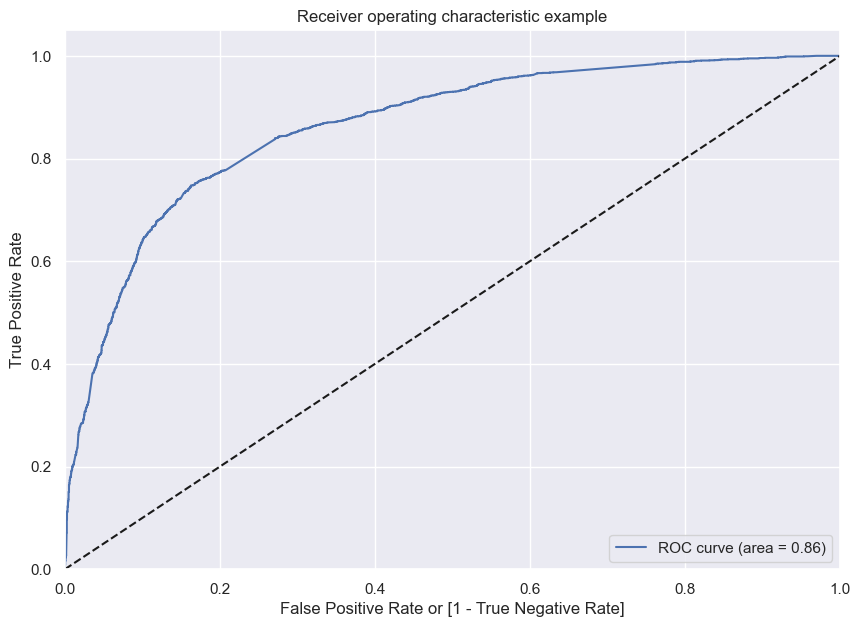

In [101]:
#Let's call the draw_roc function

draw_roc(y_train_pred_fin.Converted, y_train_pred_fin.Conversion_Prob)


As we can see, the **area under ROC curve is 0.86**, which is generally considered to provide a good performance

To visualize better, let's create a dataframe where we can see accuracy, sesnsitivity, specificity for different points of probablity, from 0.0 to 0.9.
<br> Of course, we will need to create a confusion matrix to get that

In [102]:
ctof_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    predicted = y_train_pred_fin['Conversion_Prob'].map(lambda x: 1 if x > i else 0)
    cm = metrics.confusion_matrix(y_train_pred_fin['Converted'], predicted)
    
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    
    ctof_df.loc[len(ctof_df)] = [i, accuracy, sensitivity, specificity]

ctof_df

,Probability,Accuracy,Sensitivity,Specificity
0,0.0,0.382344,1.000000,0.000000
1,0.1,0.597015,0.968023,0.367352
2,0.2,0.695141,0.907392,0.563753
3,0.3,0.788981,0.776163,0.796915
4,0.4,0.803112,0.717193,0.856298
5,0.5,0.801683,0.661960,0.888175
6,0.6,0.789298,0.593023,0.910797
7,0.7,0.770403,0.500000,0.937789
8,0.8,0.742775,0.389120,0.961697
9,0.9,0.682756,0.182309,0.992545


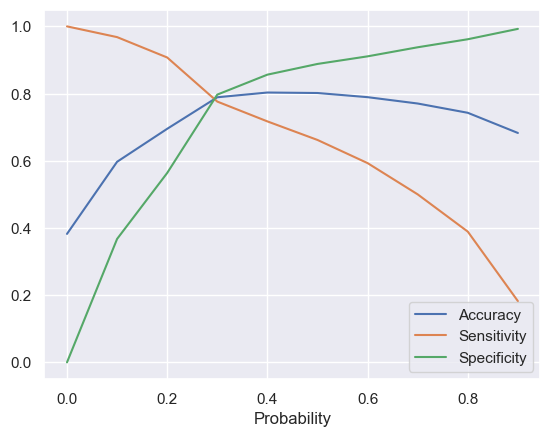

In [103]:
#Let's go ahead and plot a curve for the above

ctof_df.plot.line(x = 'Probability', y = ['Accuracy','Sensitivity','Specificity'])
plt.show()

As we can see, **0.3 appears to be a good cutoff**. 

In [104]:
#Taking 0.3 as cutoff, approaching again

y_train_pred_fin['final_predicted'] = y_train_pred_fin.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_fin.head()

,Converted,Conversion_Prob,Predicted,final_predicted
0,0.0,0.099055,0,0
1,1.0,0.976990,1,1
2,1.0,0.297365,0,0
3,1.0,0.653080,1,1
4,1.0,0.274878,0,0


In [105]:
#Confusion matrix

confusion_2 = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted )
confusion_2

array([[3100,  790],
       [ 539, 1869]], dtype=int64)

As we can see,
<br>**True Positives (TP)**: 1869 - Correctly predicted positive cases.
<br>**True Negatives (TN)**: 3100 - Correctly predicted negative cases.
<br>**False Positives (FP)**: 790 - Negative cases incorrectly predicted as positive.
<br>**False Negatives (FN)**: 539 - Positive cases incorrectly predicted as negative.

If we compare with the last model's matrix scores, we can certainly say our new cutoff deals with positives much better, which is the main ask of the business problem.ive.

In [106]:
TP = confusion_2[1,1]
TN = confusion_2[0,0]
FP = confusion_2[0,1] 
FN = confusion_2[1,0]

#Accuracy

print('Accuracy:', metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted))

#Sensitivity
print('Sensitivity:', TP/(TP+FN))

#Specificity
print('Specificity:', TN/(TN+FP))

Accuracy: 0.7889806287710385
Sensitivity: 0.7761627906976745
Specificity: 0.7969151670951157


So, as we can see, our new model now has:
<br>1. **Accuracy** of ~79%
<br>2. **Sensitivity** of ~78%
<br>3. **Sensitivity** of ~80%

## Now, let's create Lead Score 
For better understanding, we will add the Lead Number data from the original dataframe and then generate lead score on Train

In [107]:
#converting y_train_pred to dataframe
y_train_pred_fin = pd.DataFrame(y_train_pred_fin)


In [108]:
#Adding Lead Number to Train data

y_train_pred_fin = y_train_pred_fin.merge(leads_data['Lead Number'], how = 'left', left_index = True, right_index = True)


In [109]:
#Let's create Lead Score

y_train_pred_fin['Lead Score'] = y_train_pred_fin['Conversion_Prob'] * 100
y_train_pred_fin = y_train_pred_fin[['Lead Number', 'Converted', 'Predicted', 'Conversion_Prob', 'Lead Score']].sort_values('Lead Score', ascending = False)

y_train_pred_fin.head()


,Lead Number,Converted,Predicted,Conversion_Prob,Lead Score
2810,632785,1.0,1,0.999542,99.954230
97,659545,1.0,1,0.999509,99.950896
3182,629524,1.0,1,0.999259,99.925891
1931,640972,1.0,1,0.999241,99.924143
852,651501,1.0,1,0.999226,99.922558


So, as we can see, our model is now fully ready as **it is generating Lead Scores**. 
<br>The **Evaluation Metrics** as well as the final **Logistic Regression Model** were given earlier above.